In [7]:
#import libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
#read data
df = pd.read_csv('C:/Users/DELL/Desktop/mini/Data/diabetes.csv')

In [9]:
#describe data
df.describe()

Pregnancies      Glucose  BloodPressure  SkinThickness      Insulin  \
count  2000.000000  2000.000000    2000.000000    2000.000000  2000.000000   
mean      3.703500   121.182500      69.145500      20.935000    80.254000   
std       3.306063    32.068636      19.188315      16.103243   111.180534   
min       0.000000     0.000000       0.000000       0.000000     0.000000   
25%       1.000000    99.000000      63.500000       0.000000     0.000000   
50%       3.000000   117.000000      72.000000      23.000000    40.000000   
75%       6.000000   141.000000      80.000000      32.000000   130.000000   
max      17.000000   199.000000     122.000000     110.000000   744.000000   

               BMI  DiabetesPedigreeFunction          Age      Outcome  
count  2000.000000               2000.000000  2000.000000  2000.000000  
mean     32.193000                  0.470930    33.090500     0.342000  
std       8.149901                  0.323553    11.786423     0.474498  
min       0.000000                  0.078000    21.000000     0.000000  
25%      27.375000                  0.244000    24.000000     0.000000  
50%      32.300000                  0.376000    29.000000     0.000000  
75%      36.800000                  0.624000    40.000000     1.000000  
max      80.600000                  2.420000    81.000000     1.000000

In [10]:
#information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2000 non-null   int64  
 1   Glucose                   2000 non-null   int64  
 2   BloodPressure             2000 non-null   int64  
 3   SkinThickness             2000 non-null   int64  
 4   Insulin                   2000 non-null   int64  
 5   BMI                       2000 non-null   float64
 6   DiabetesPedigreeFunction  2000 non-null   float64
 7   Age                       2000 non-null   int64  
 8   Outcome                   2000 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 140.8 KB


In [11]:
#check for null values
df.isnull().values.any()

False

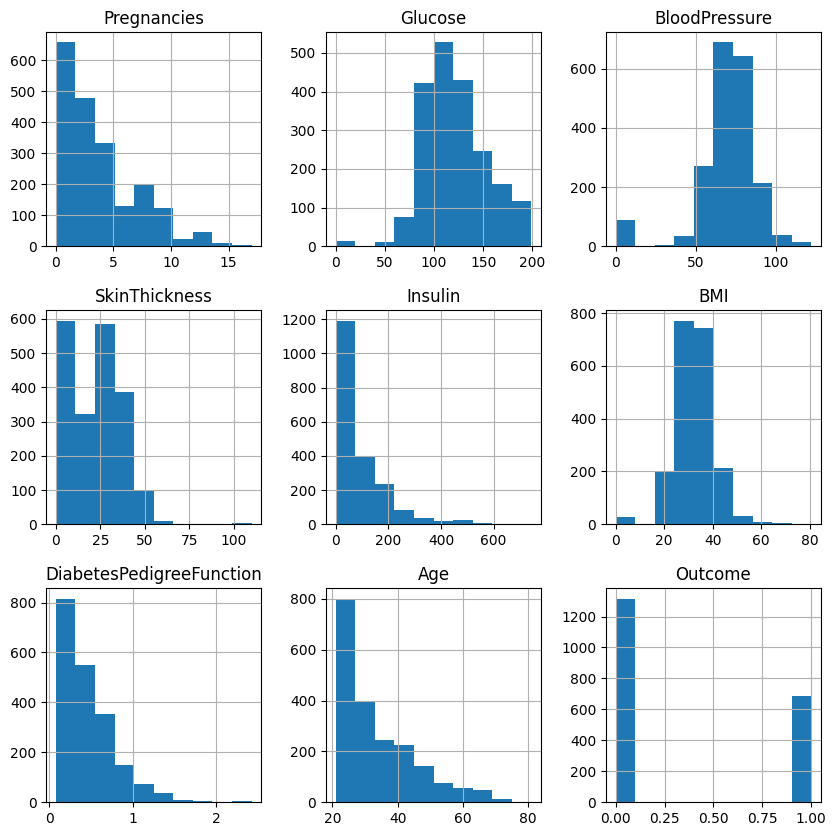

In [12]:
#generating histogram for all fields
df.hist(figsize=(10,10))
plt.show()

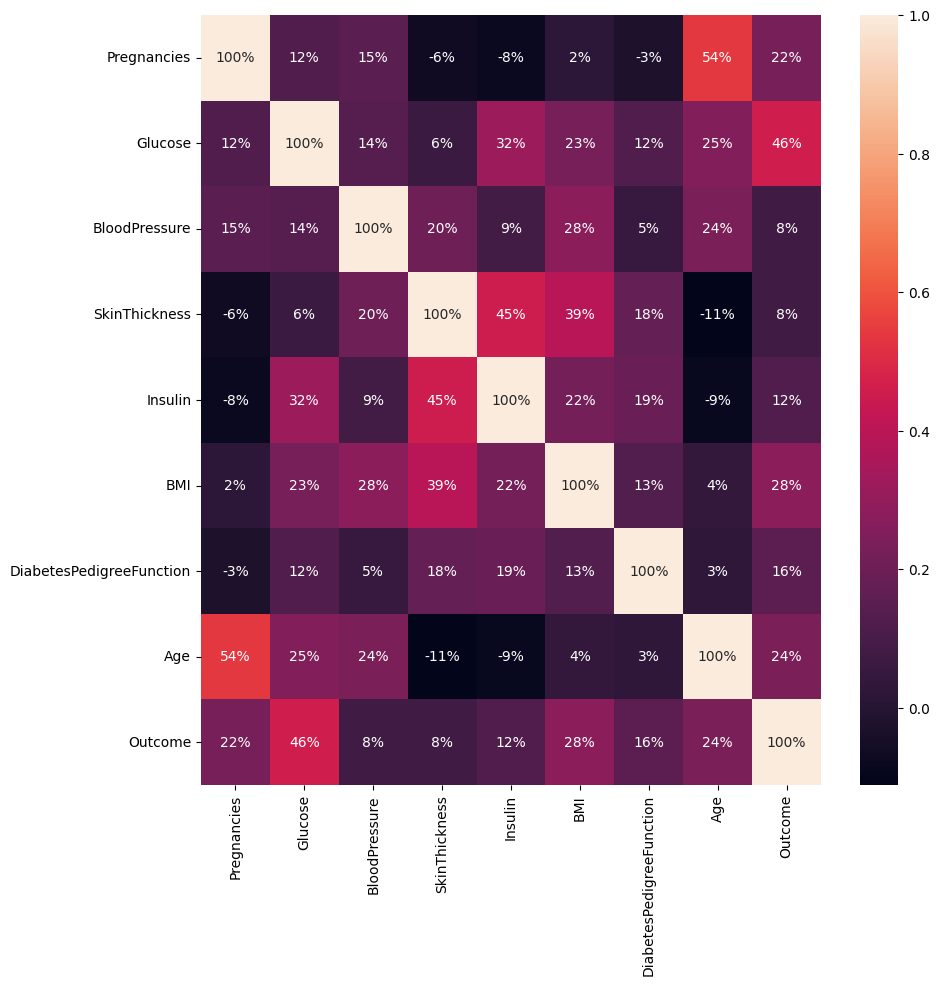

In [13]:
#co-relation using heatmap
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,fmt='.0%')
plt.show()

<Axes: xlabel='Outcome', ylabel='count'>

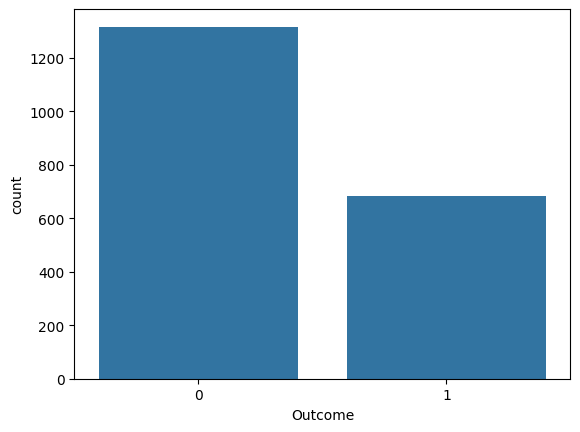

In [14]:
#cheching total entries of diabetic and non-diabetic person
sns.countplot(x='Outcome',data=df)

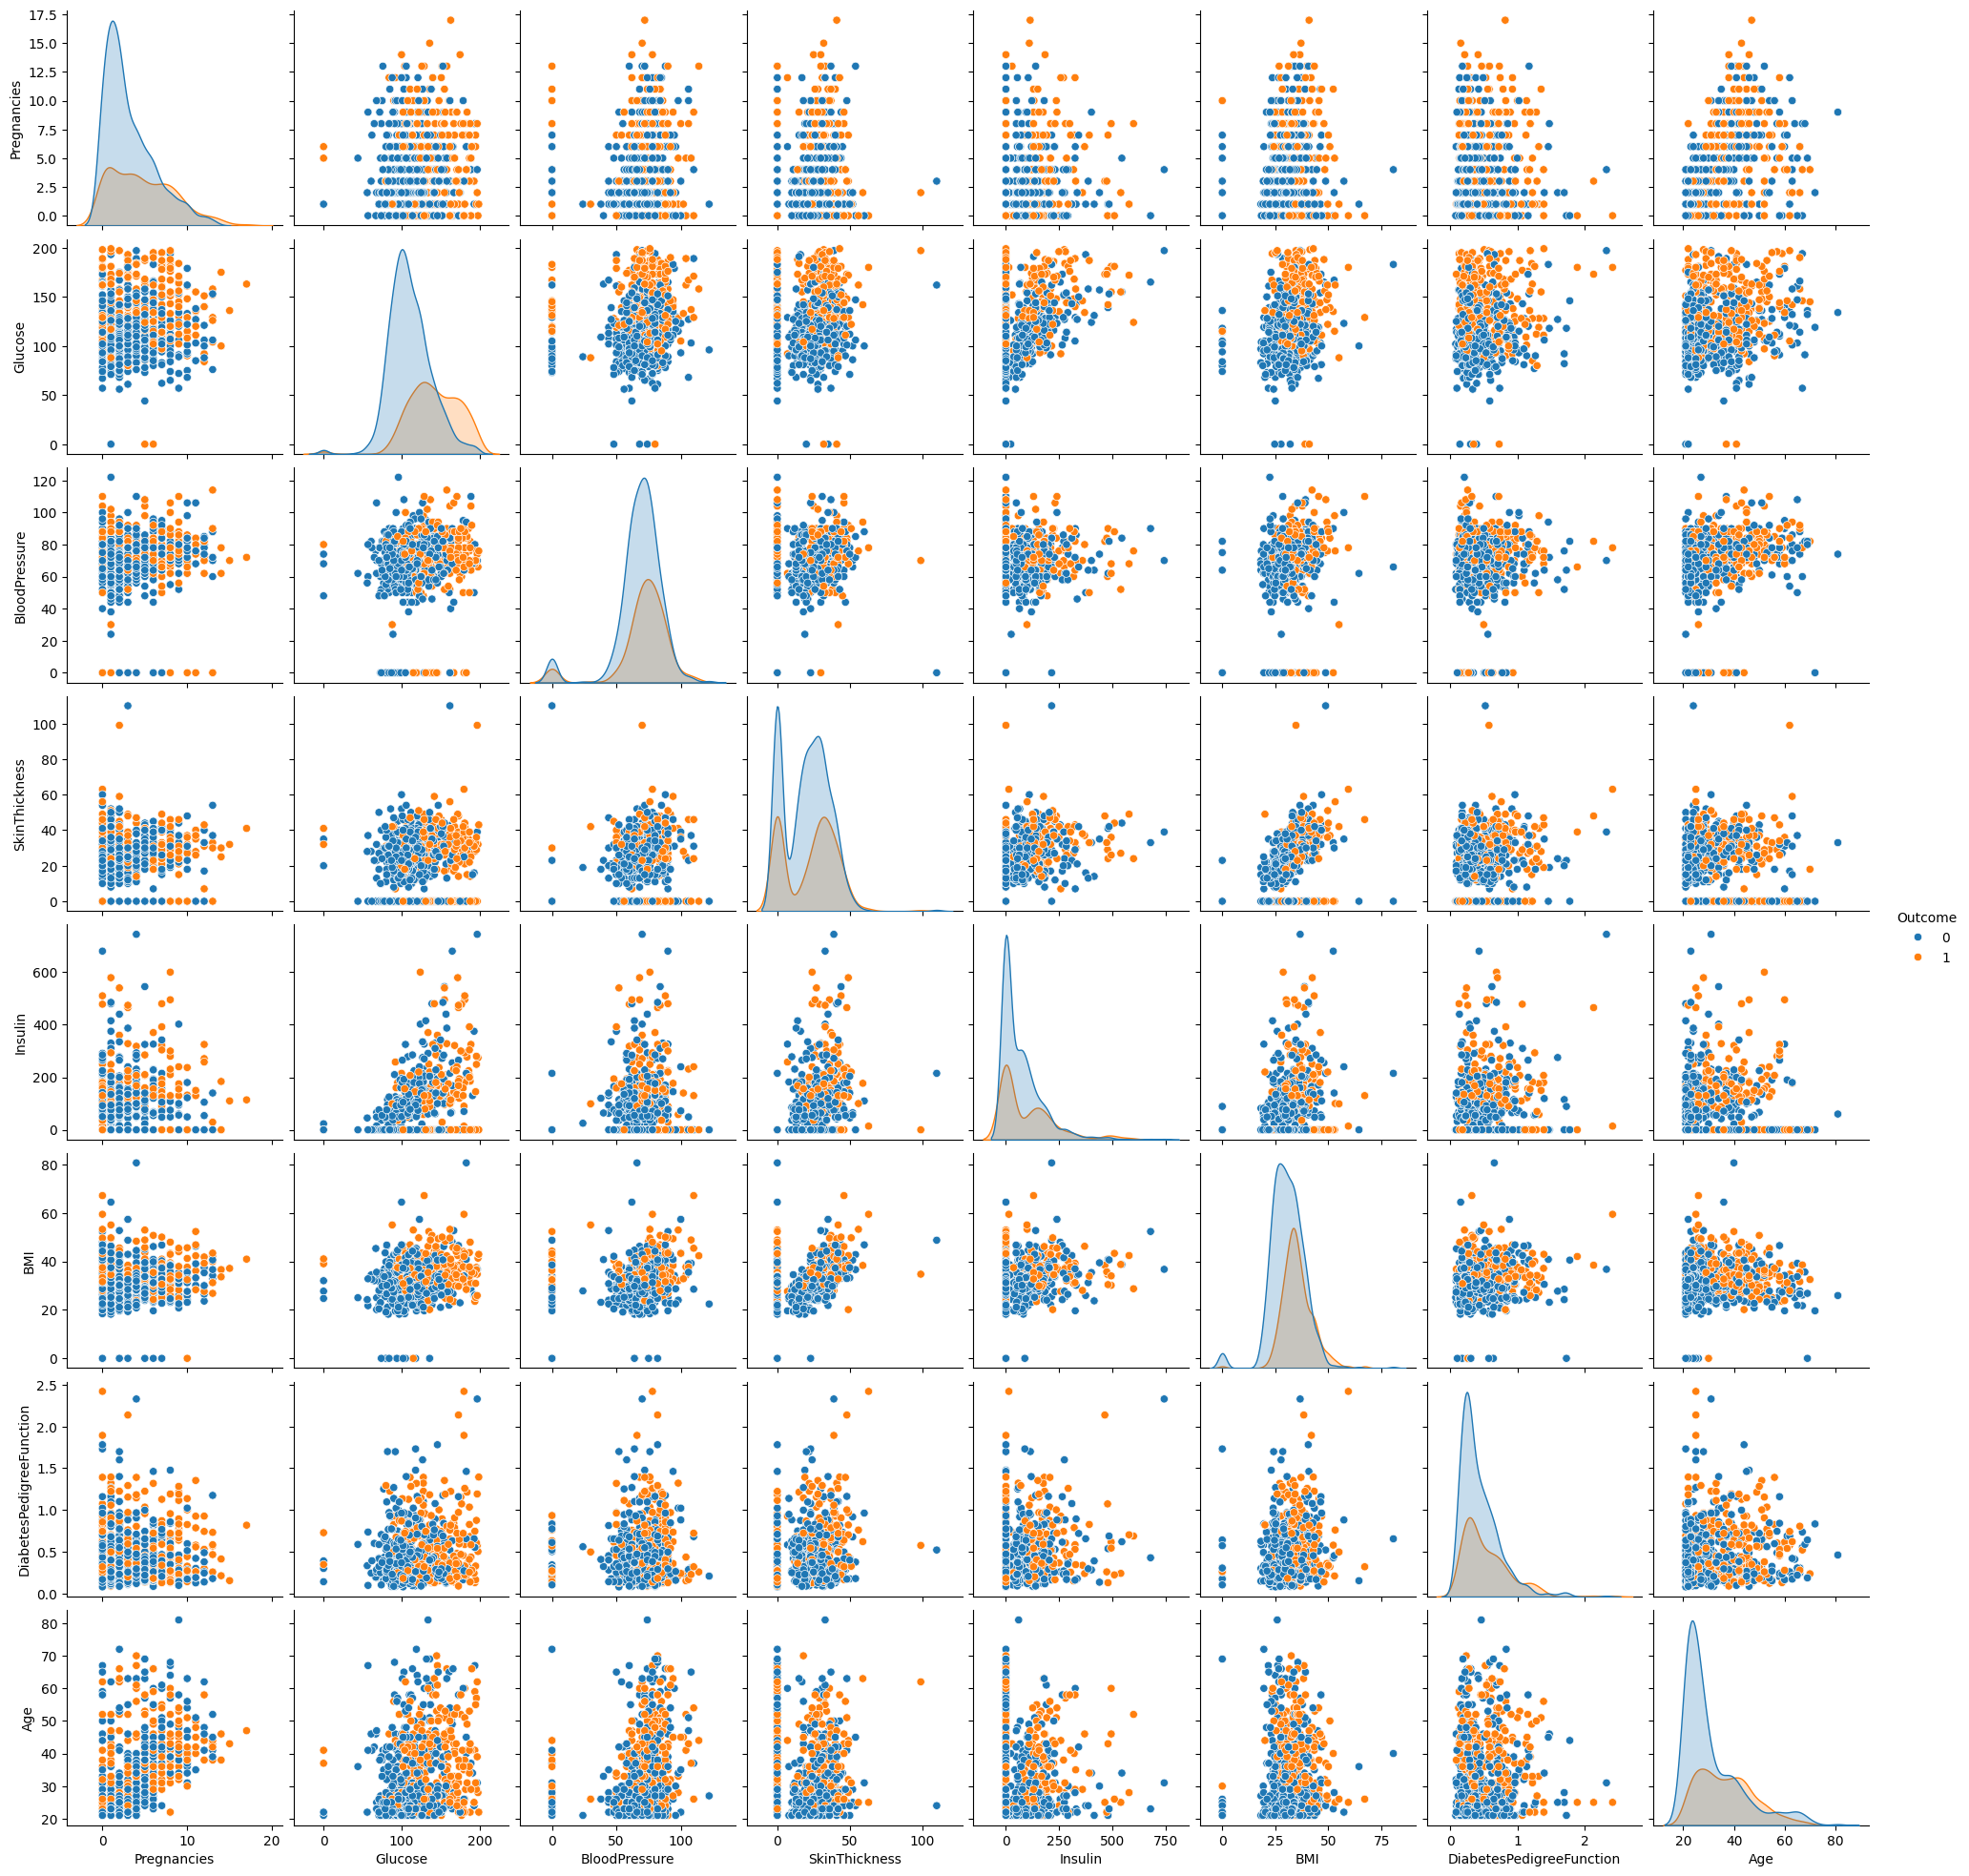

In [15]:
#generate a scatter plot matrix
sns.pairplot(df, hue='Outcome')
plt.show()

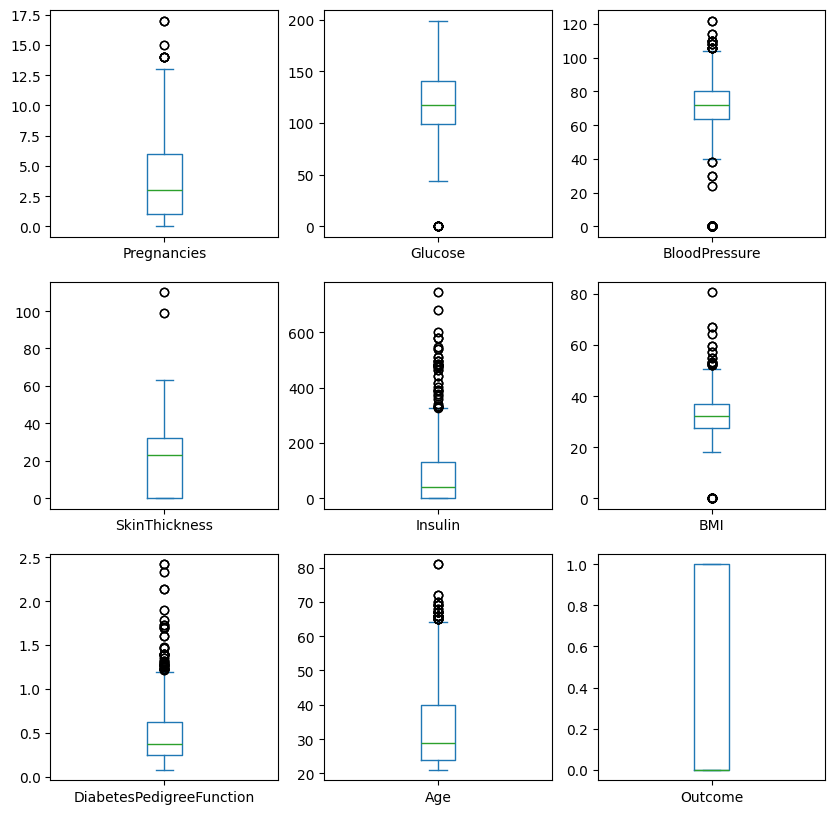

In [16]:
#boxplot for outlier visualization
df.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False, figsize=(10,10))
plt.show()

In [17]:
#outlier remover
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Pregnancies                   5.000
Glucose                      42.000
BloodPressure                16.500
SkinThickness                32.000
Insulin                     130.000
BMI                           9.425
DiabetesPedigreeFunction      0.380
Age                          16.000
Outcome                       1.000
dtype: float64


In [18]:
#outlier remove
df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df.shape

(1652, 9)

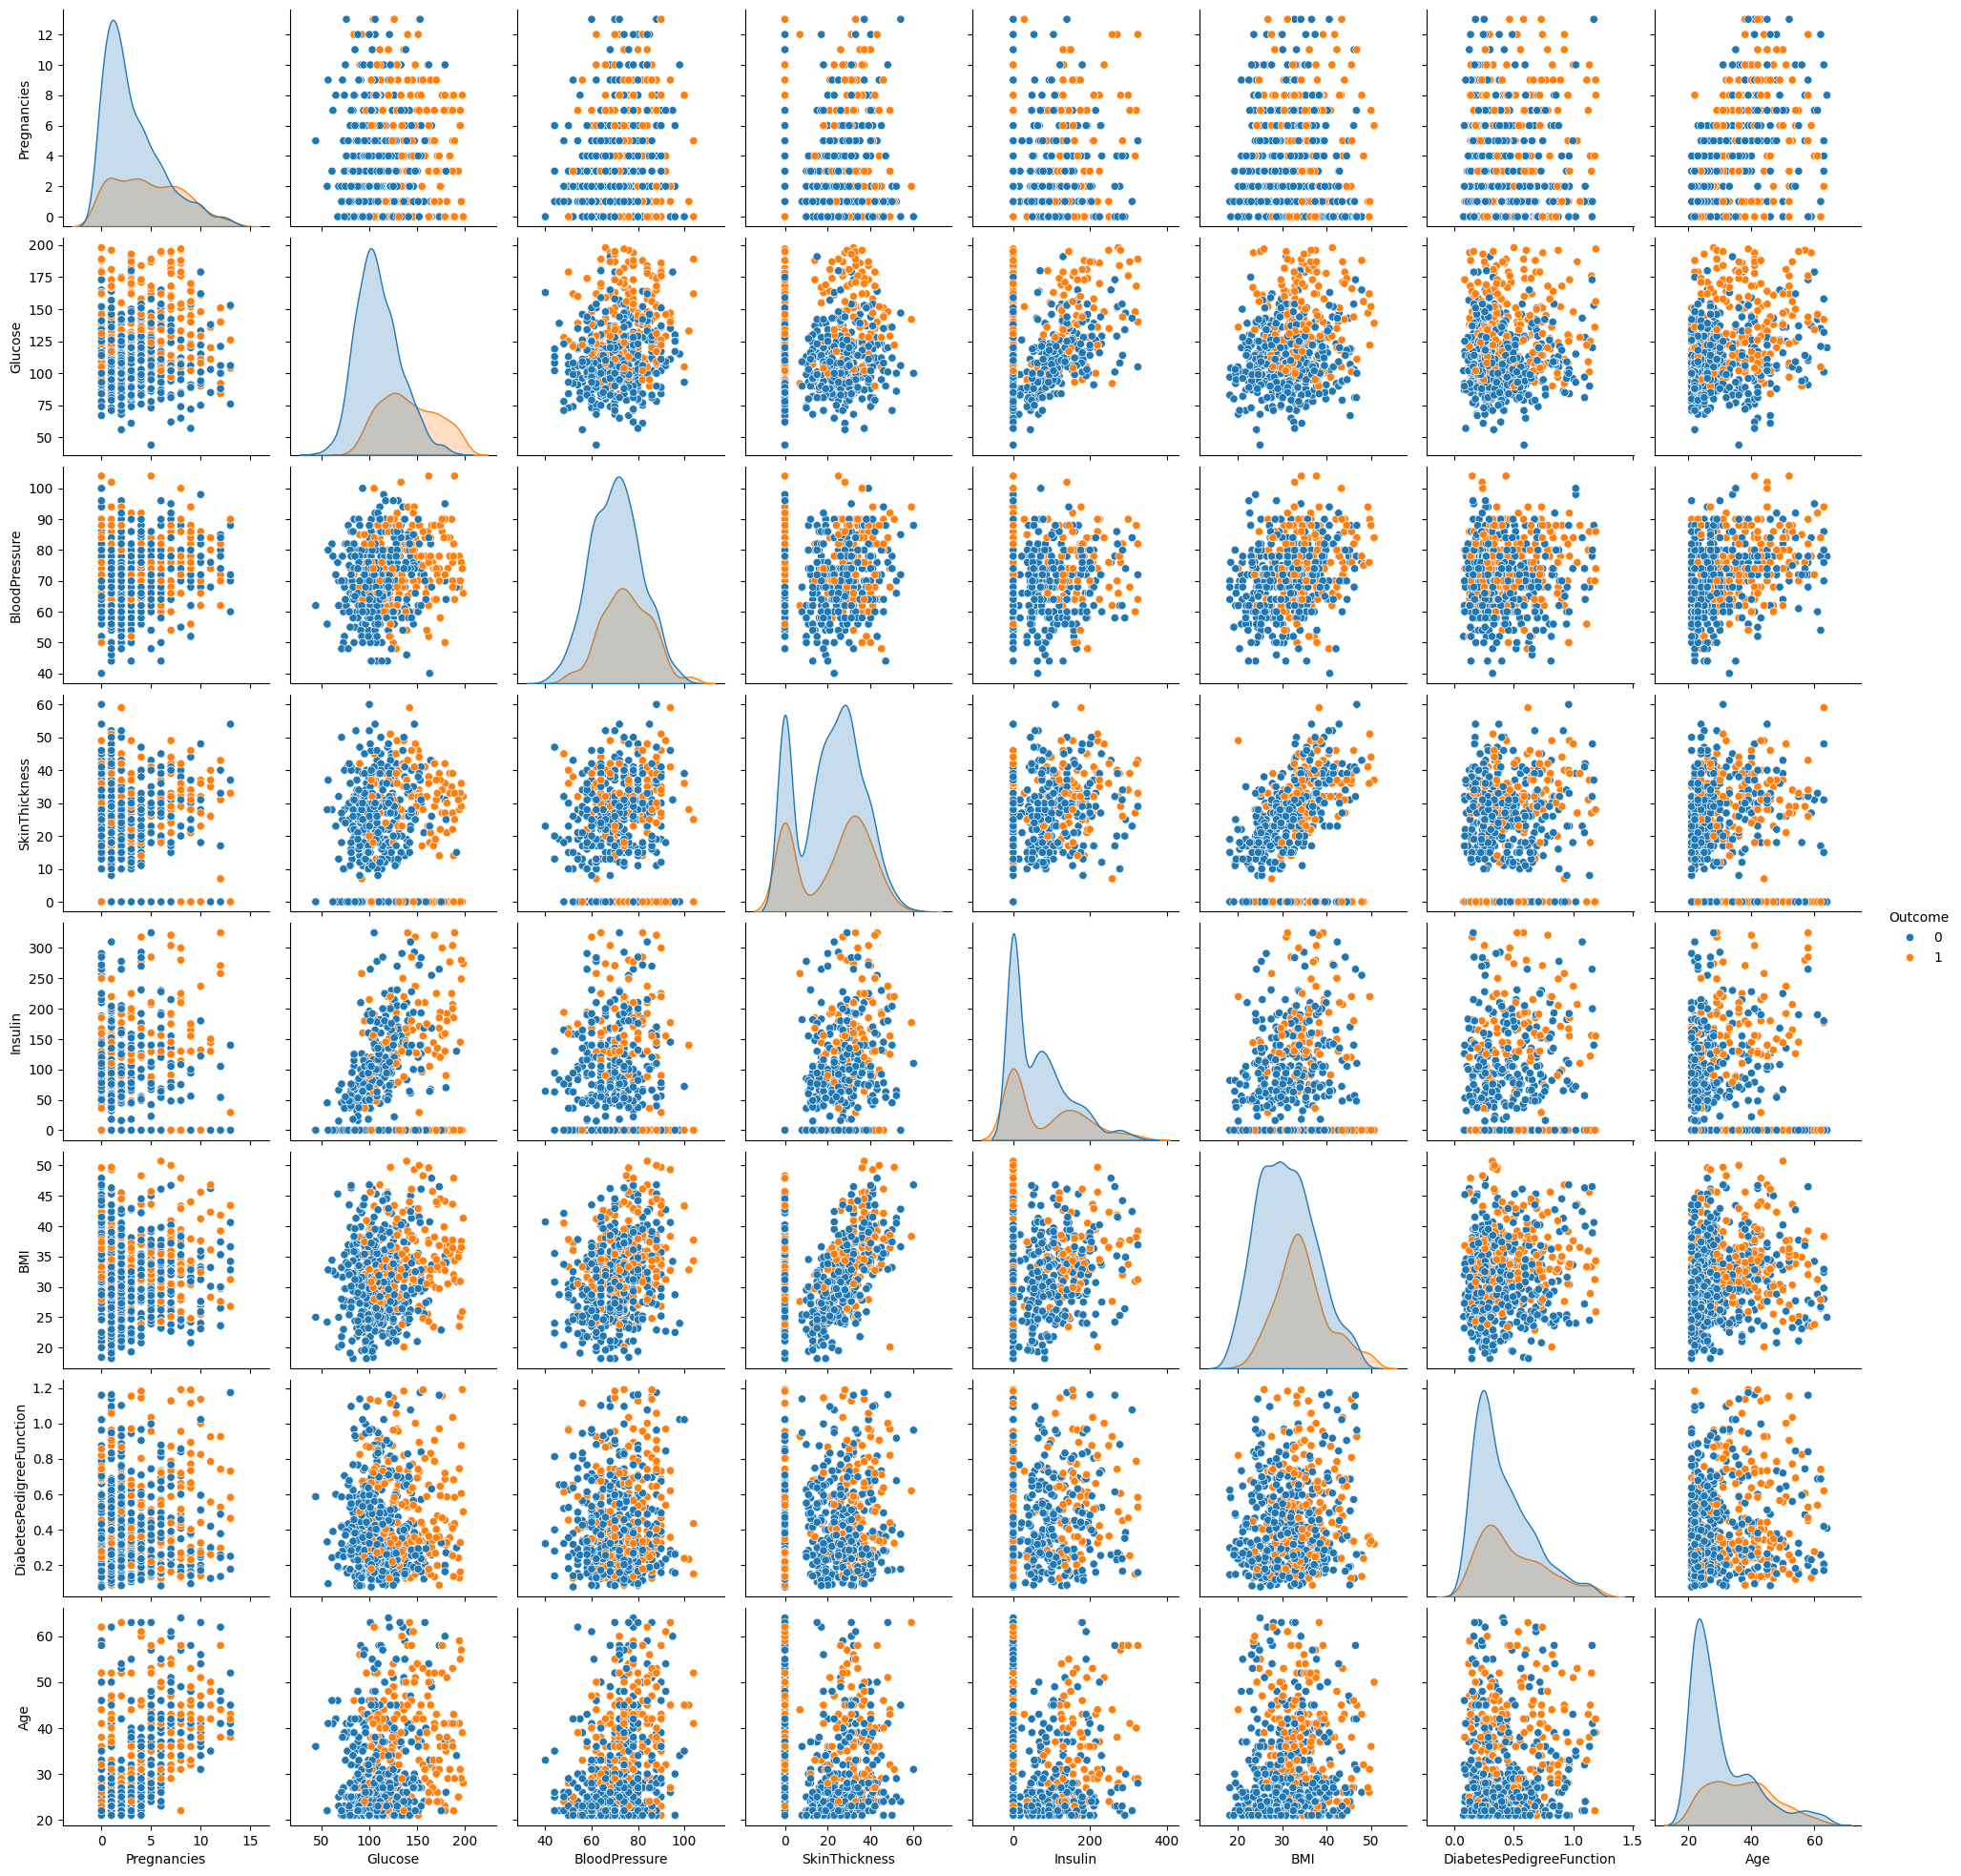

In [19]:
#scatter matrix after removing outlier
sns.pairplot(df, hue='Outcome')
plt.show()

In [20]:
#splitting train data and test data
from sklearn.model_selection import train_test_split
X = df.iloc[:,0:8].values
Y = df.iloc[:,8].values
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [21]:
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((1321, 8), (331, 8), (1321,), (331,))

In [22]:
#Logistic Regression Model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,Y_train)

#predicting test data
pred_y = model.predict(X_test)


#confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test,pred_y)
cm

#accuracy score
from sklearn.metrics import accuracy_score
score_lr = accuracy_score(Y_test,pred_y)
score_lr

#classification report
from sklearn.metrics import classification_report
cr = classification_report(Y_test,pred_y)
print(cr)

              precision    recall  f1-score   support

           0       0.85      0.89      0.87       234
           1       0.71      0.63      0.67        97

    accuracy                           0.82       331
   macro avg       0.78      0.76      0.77       331
weighted avg       0.81      0.82      0.81       331



c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [23]:
#Support Vector Machine
from sklearn.svm import SVC
model = SVC()
model.fit(X_train,Y_train)

#predicting test data
pred_y = model.predict(X_test)

#confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test,pred_y)
cm

#accuracy score
from sklearn.metrics import accuracy_score
score_svm = accuracy_score(Y_test,pred_y)
score_svm

#classification report
from sklearn.metrics import classification_report
cr = classification_report(Y_test,pred_y)
print(cr)

              precision    recall  f1-score   support

           0       0.81      0.92      0.86       234
           1       0.71      0.47      0.57        97

    accuracy                           0.79       331
   macro avg       0.76      0.70      0.71       331
weighted avg       0.78      0.79      0.77       331



In [24]:
#KNN Algorithm
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train,Y_train)

#predicting test data
pred_y = model.predict(X_test)

#confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test,pred_y)
cm

#accuracy score
from sklearn.metrics import accuracy_score
score_knn = accuracy_score(Y_test,pred_y)
score_knn

#classification report
from sklearn.metrics import classification_report
cr = classification_report(Y_test,pred_y)
print(cr)

              precision    recall  f1-score   support

           0       0.89      0.89      0.89       234
           1       0.73      0.72      0.73        97

    accuracy                           0.84       331
   macro avg       0.81      0.81      0.81       331
weighted avg       0.84      0.84      0.84       331



In [25]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train,Y_train)

#predicting test data
pred_y = rfc.predict(X_test)

#confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test,pred_y)
cm

#accuracy score
from sklearn.metrics import accuracy_score
score_rf = accuracy_score(Y_test,pred_y)
score_rf

#classification report
from sklearn.metrics import classification_report
cr = classification_report(Y_test,pred_y)
print(cr)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       234
           1       0.97      0.92      0.94        97

    accuracy                           0.97       331
   macro avg       0.97      0.95      0.96       331
weighted avg       0.97      0.97      0.97       331



In [26]:
#Naive Bayes 
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train,Y_train)

#predicting test data
pred_y = model.predict(X_test)

#confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test,pred_y)
cm

#accuracy score
from sklearn.metrics import accuracy_score
score_nb = accuracy_score(Y_test,pred_y)
score_nb

#classification report
from sklearn.metrics import classification_report
cr = classification_report(Y_test,pred_y)
print(cr)

              precision    recall  f1-score   support

           0       0.85      0.85      0.85       234
           1       0.64      0.65      0.64        97

    accuracy                           0.79       331
   macro avg       0.74      0.75      0.75       331
weighted avg       0.79      0.79      0.79       331



In [27]:
#Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier()
model.fit(X_train,Y_train)

#predicting test data
pred_y = model.predict(X_test)

#confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test,pred_y)
cm

#accuracy score
from sklearn.metrics import accuracy_score
score_gb = accuracy_score(Y_test,pred_y)
score_gb

#classification report
from sklearn.metrics import classification_report
cr = classification_report(Y_test,pred_y)
print(cr)

              precision    recall  f1-score   support

           0       0.90      0.96      0.93       234
           1       0.89      0.74      0.81        97

    accuracy                           0.90       331
   macro avg       0.89      0.85      0.87       331
weighted avg       0.90      0.90      0.89       331



In [28]:
#XGBoost
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_train,Y_train)

#predicting test data
pred_y = model.predict(X_test)

#confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test,pred_y)
cm

#accuracy score
from sklearn.metrics import accuracy_score
score_xgb = accuracy_score(Y_test,pred_y)
score_xgb

#classification report
from sklearn.metrics import classification_report
cr = classification_report(Y_test,pred_y)
print(cr)

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       234
           1       0.95      0.91      0.93        97

    accuracy                           0.96       331
   macro avg       0.95      0.94      0.95       331
weighted avg       0.96      0.96      0.96       331



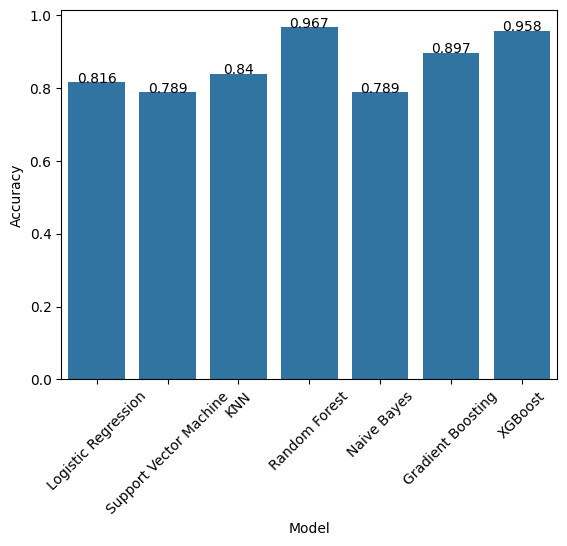

In [29]:
# plot the bar graph to compare accuracy of above models
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
model_names = ['Logistic Regression', 'Support Vector Machine', 'KNN', 'Random Forest', 'Naive Bayes', 'Gradient Boosting', 'XGBoost']
accuracy_scores = [score_lr, score_svm, score_knn, score_rf, score_nb, score_gb, score_xgb] 
df = pd.DataFrame({'Model': model_names, 'Accuracy': accuracy_scores})
sns.barplot(x='Model', y='Accuracy', data=df)
plt.xticks(rotation=45)
#show values on top
for index, row in df.iterrows():
    plt.text(row.name,row.Accuracy, round(row.Accuracy,3), color='black', ha="center")
plt.show()

In [30]:
#testing rfc model 
data = np.array([[2,89,90,30,0,33.5,0.292,42]])
prediction = rfc.predict(data)
print(prediction)

[0]


In [31]:
#load model
import pickle
pickle.dump(rfc, open('model.pkl','wb'))